<a href="https://colab.research.google.com/github/DhafinRA/ML-Upatik/blob/main/Food_Classification_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
#                                                             horizontal_flip=True,
#                                                             vertical_flip=True,
#                                                             rotation_range=60,
#                                                             width_shift_range=0.8,
#                                                             height_shift_range=0.8,)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

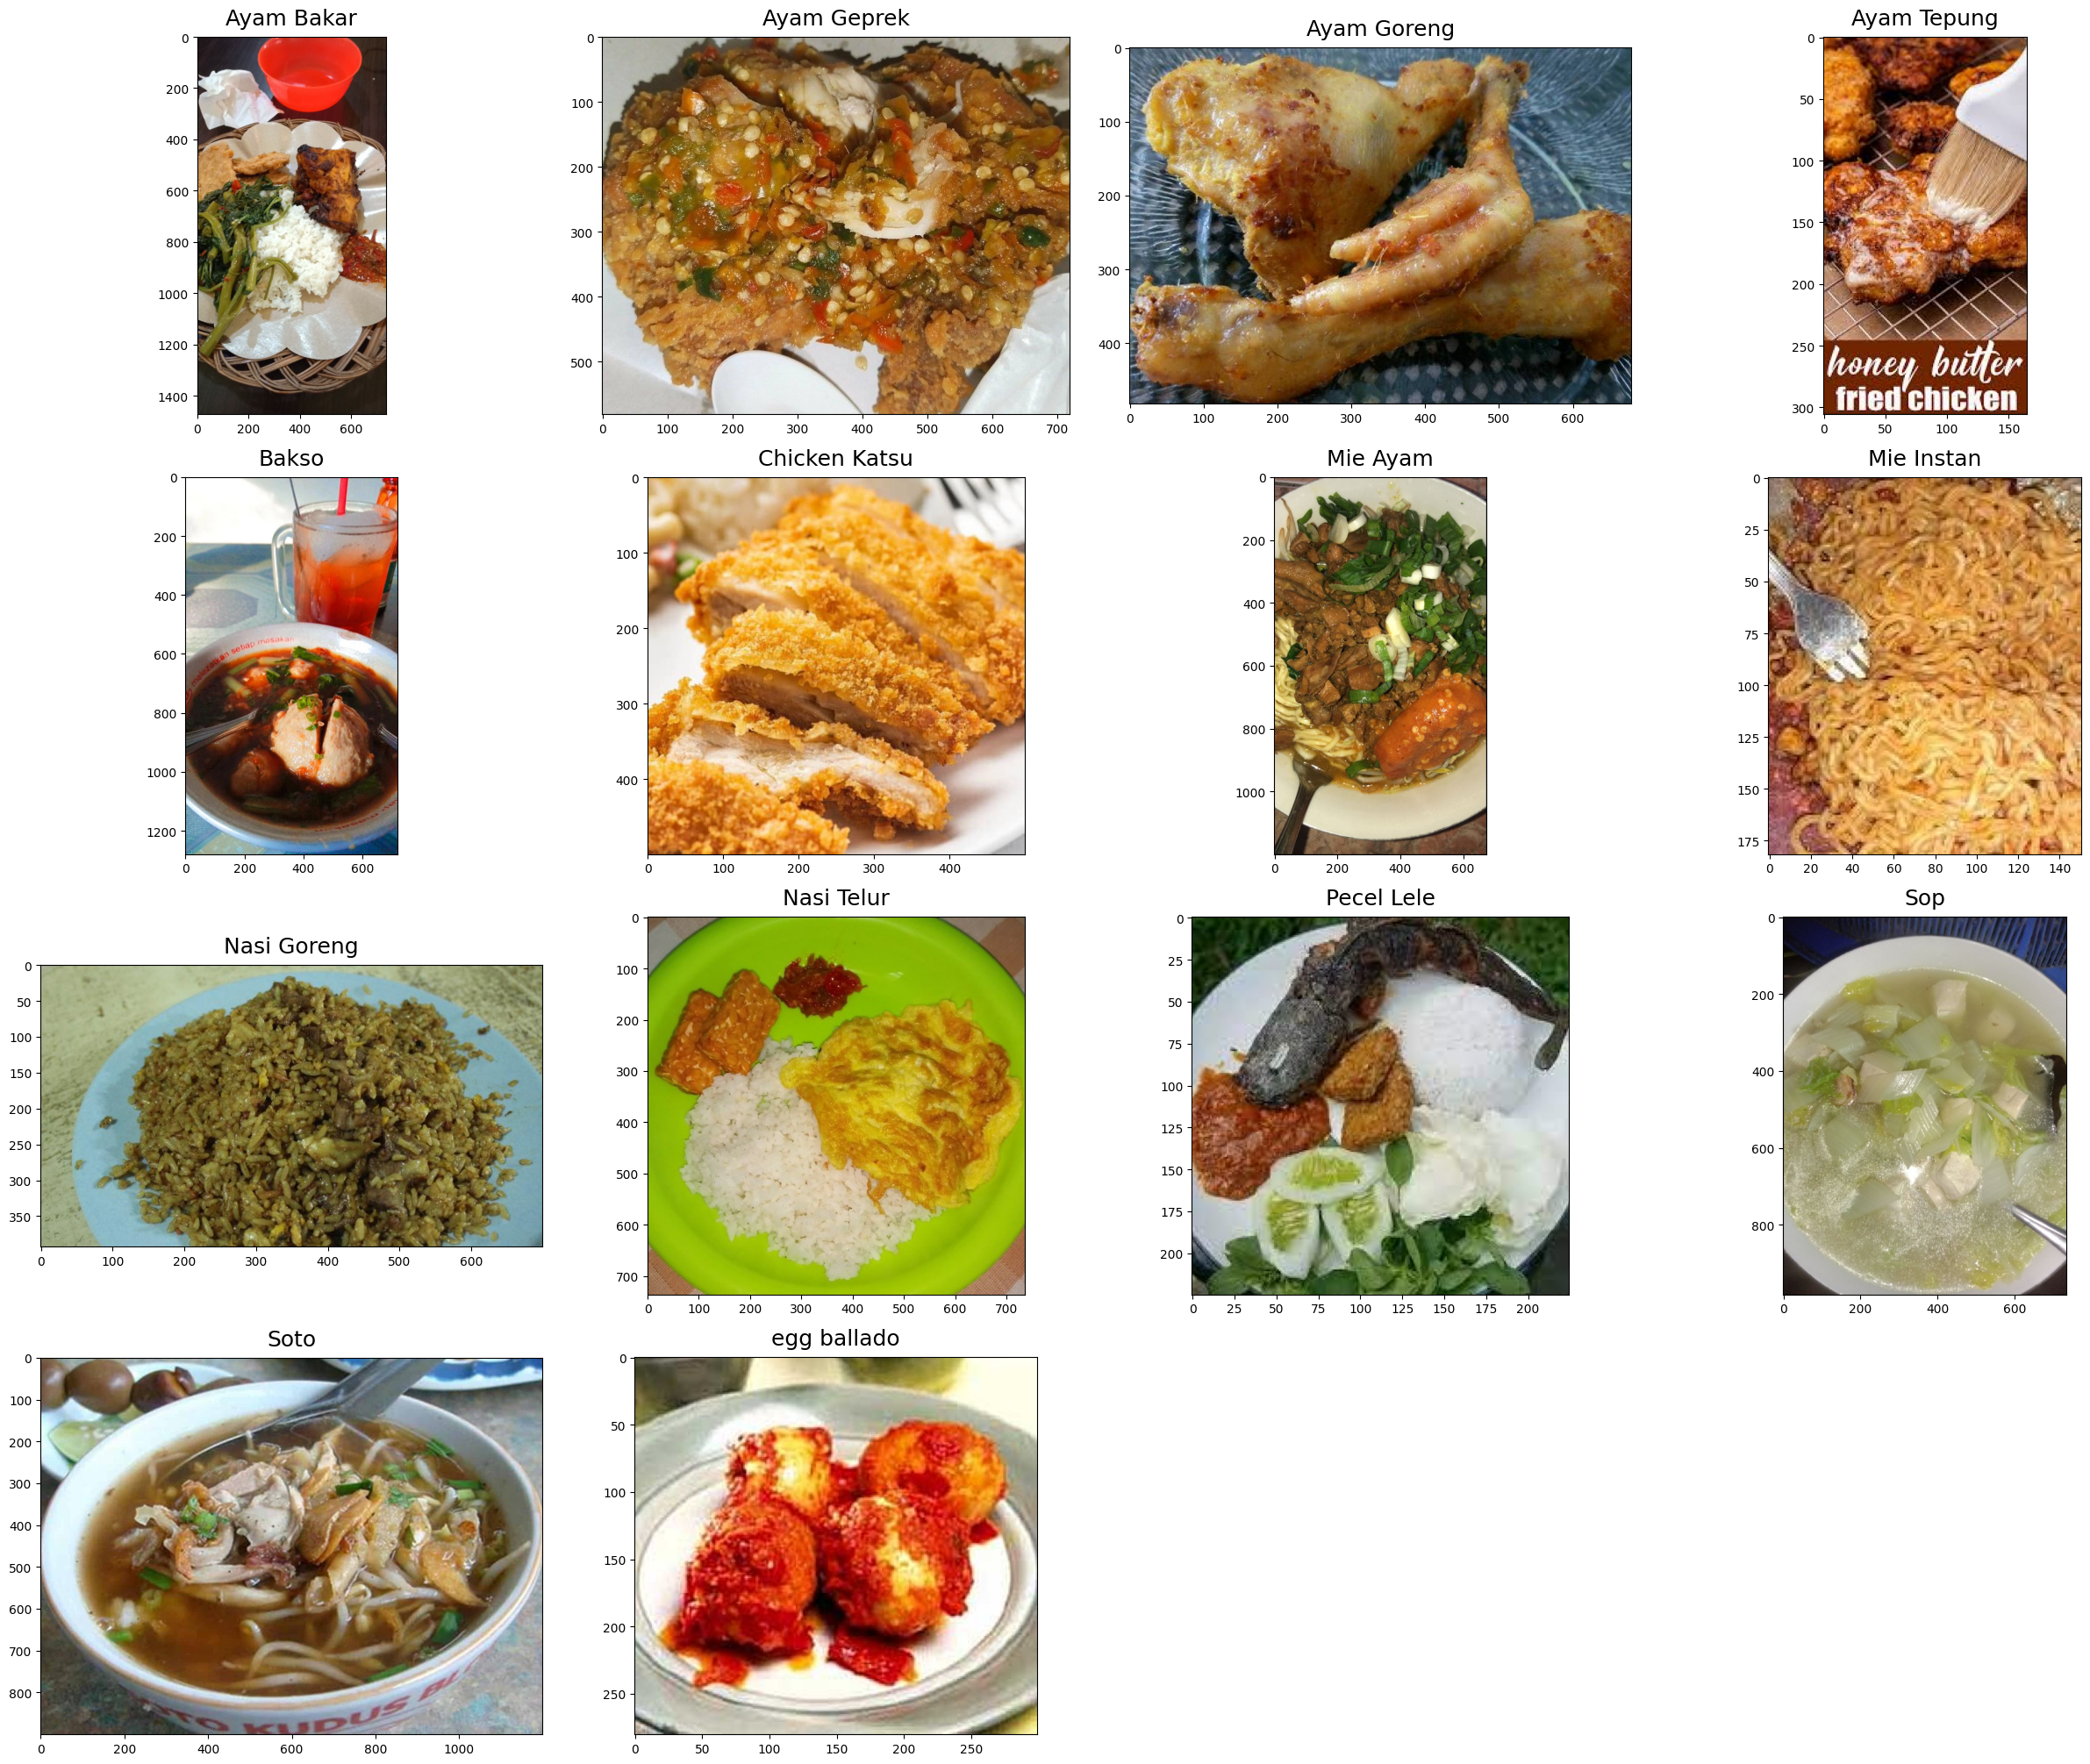

In [3]:
train_dir = "Dataset\Train"
test_dir = "Dataset\Test"
images = []
labels = []

for food_folder in sorted(os.listdir(train_dir)):
    food_items = os.listdir(train_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('\\')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    labels.append(category)

plt.tight_layout()

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    color_mode='rgb')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(224, 224),
                                                    batch_size=2,
                                                    class_mode='categorical',
                                                    color_mode='rgb')

Found 1938 images belonging to 14 classes.
Found 256 images belonging to 14 classes.


In [19]:
# class myCallback(tf.keras.callbacks.Callback):
#         def on_epoch_end(self, epoch, logs={}):
#             if (logs.get('val_accuracy') > 0.83 and logs.get('accuracy')>0.83):
#                 print('\naccuracy and validation accuracy reached 83%,so cancelling training!')
#                 self.model.stop_training = True
                
# callbacks = myCallback()

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Model/model.weights.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(14,activation='softmax')
])


model.compile(loss='CategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator,epochs=10,validation_data=test_generator,callbacks=[model_checkpoint_callback])

Epoch 1/10
194/194 [==============================] - ETA: 0s - loss: 2.3680 - accuracy: 0.2559

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


194/194 [==============================] - 50s 243ms/step - loss: 2.3680 - accuracy: 0.2559 - val_loss: 2.5768 - val_accuracy: 0.1094
Epoch 2/10
194/194 [==============================] - 57s 295ms/step - loss: 2.1169 - accuracy: 0.3060 - val_loss: 2.4845 - val_accuracy: 0.1406
Epoch 3/10
194/194 [==============================] - 55s 282ms/step - loss: 1.9101 - accuracy: 0.3741 - val_loss: 2.4010 - val_accuracy: 0.2461
Epoch 4/10
194/194 [==============================] - 54s 279ms/step - loss: 1.5756 - accuracy: 0.4814 - val_loss: 2.5061 - val_accuracy: 0.2578
Epoch 5/10
194/194 [==============================] - 53s 274ms/step - loss: 1.2009 - accuracy: 0.5960 - val_loss: 2.3845 - val_accuracy: 0.2500
Epoch 6/10
194/194 [==============================] - 53s 274ms/step - loss: 0.7765 - accuracy: 0.7348 - val_loss: 3.0242 - val_accuracy: 0.3047
Epoch 7/10
194/194 [==============================] - 53s 272ms/step - loss: 0.4234 - accuracy: 0.8535 - val_loss: 4.3049 - val_accuracy: 0.2

In [11]:
base_model = tf.keras.applications.MobileNet(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.summary()

17225924/17225924 [==============================] - 7s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                 

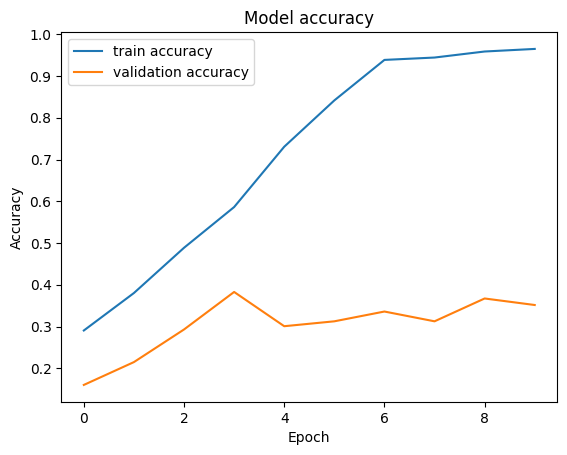

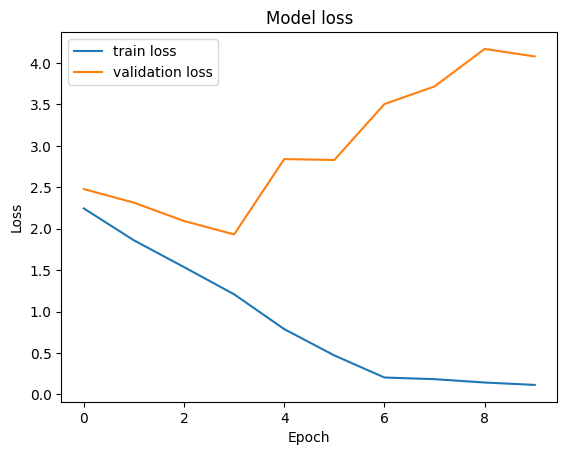

In [21]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history)
plot_loss(history)

In [ ]:
def load_image(img_path, show=False):

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224,3))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:
img_path = 'Dataset/Test/Ayam Goreng/97.jpg'
new_image = load_image(img_path,show=True)

pred = model.predict(new_image)
result = np.argmax(pred)
print(labels[result])
